In [1]:
from sklearn import mixture
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:

def plot_results(X, Y_, means, covariances, index, title, plot_gmm = True):
    plt.figure(figsize=(15,25))
    splot = plt.subplot(3, 1, 1 + index)
    color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])
    if plot_gmm:
        for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
            v, w = np.linalg.eigh(covar)
            v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
            u = w[0] / np.linalg.norm(w[0])
            # as the DP will not use every component it has access to
            # unless it needs it, we shouldn't plot the redundant
            # components.
#             print(Y_)
            if not np.any(Y_ == i):
                continue
            plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180.0 * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
            ell.set_clip_box(splot.bbox)
            ell.set_alpha(0.5)
            splot.add_artist(ell)
    else:
        plt.scatter(X[:, 0], X[:, 1], 0.8, color="c")
        

#     plt.xlim(-9.0, 5.0)
#     plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

### Comparing GMM vs Dirichlet Process on cluster of data

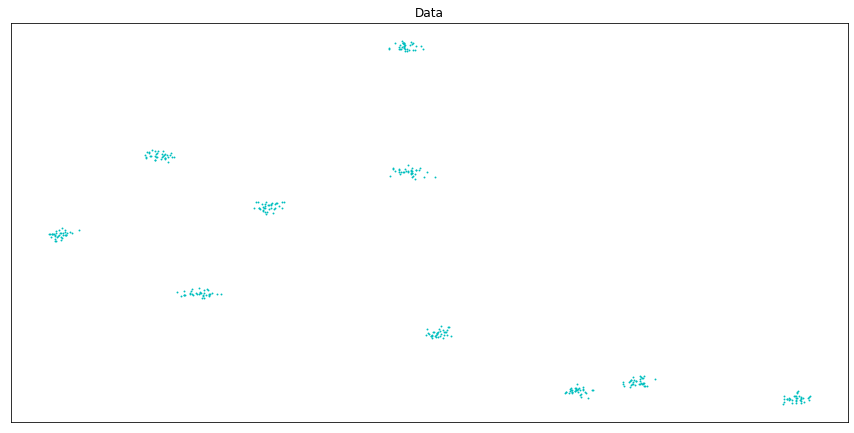

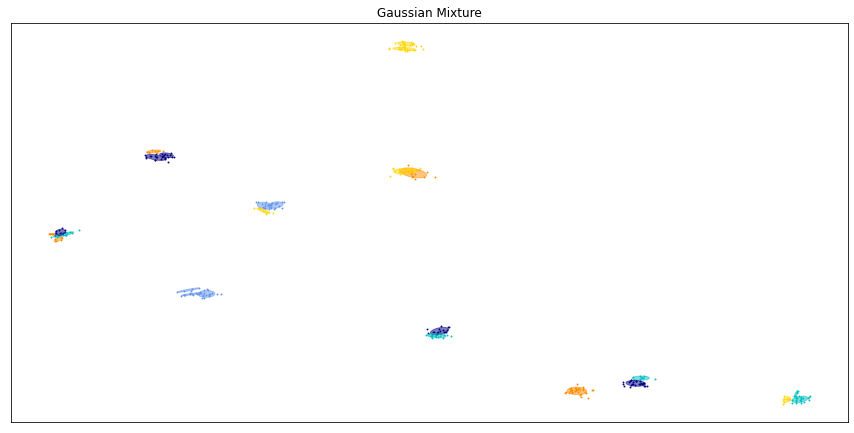

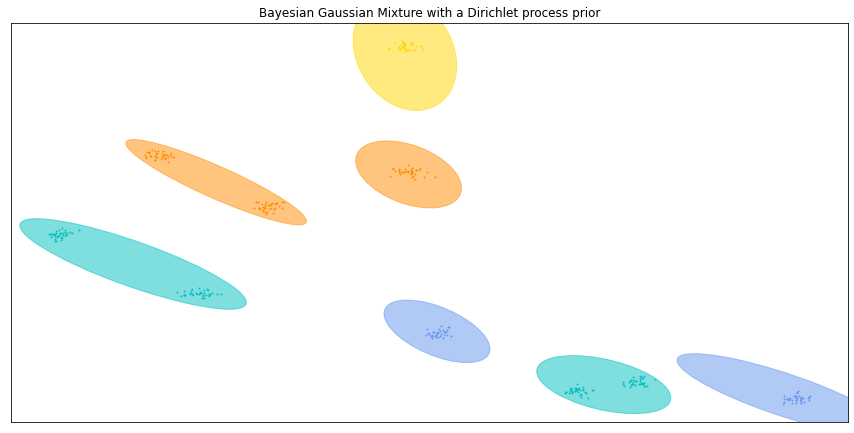

In [3]:
from sklearn.datasets import make_blobs

X_temp, y_temp = make_blobs(n_samples=350, centers=10, cluster_std=0.15)

plot_results(
    X_temp,
    None,
    None,
    None,
    1,
    "Data",
    False
)

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=25, covariance_type="full", n_init = 5, verbose = 0).fit(X_temp)
plot_results(X_temp, gmm.predict(X_temp), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")
# plt.show()
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=25, covariance_type="full", n_init = 5, verbose = 0).fit(X_temp)
plot_results(
    X_temp,
    dpgmm.predict(X_temp),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Comparing GMM vs Dirichlet Process for random Data

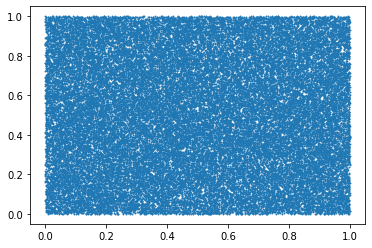

In [4]:
X_tmp = np.random.rand(50000, 2)
plt.scatter(X_tmp[:, 0], X_tmp[:, 1], 0.8, cmap='viridis')
# print(X_tmp.shape, y_tmp.shape)

##### Comment the following if you want to run on uniform data. Comment the top cell if you want to run on normal data

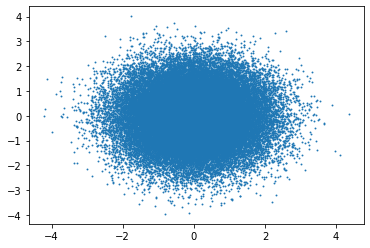

In [5]:
X_tmp = np.random.normal(size = (50000, 2))
plt.scatter(X_tmp[:, 0], X_tmp[:, 1], 0.8, cmap='viridis')
plt.show()

In [6]:
bay_gmm = mixture.BayesianGaussianMixture(n_components=100, n_init=5, verbose = 2, random_state = 1)
bay_gmm.fit(X_tmp)

Initialization 0
  Iteration 10	 time lapse 8.23958s	 ll change 148.55686
  Iteration 20	 time lapse 2.80226s	 ll change 54.05587
  Iteration 30	 time lapse 2.88299s	 ll change 28.70232
  Iteration 40	 time lapse 2.90212s	 ll change 18.11282
  Iteration 50	 time lapse 2.80731s	 ll change 12.95490
  Iteration 60	 time lapse 2.92553s	 ll change 10.30107
  Iteration 70	 time lapse 2.82024s	 ll change 8.83932
  Iteration 80	 time lapse 2.86214s	 ll change 7.33414
  Iteration 90	 time lapse 2.80515s	 ll change 4.91219
  Iteration 100	 time lapse 2.92028s	 ll change 4.39104
Initialization converged: False	 time lapse 33.96767s	 ll -52085.66920
Initialization 1
  Iteration 10	 time lapse 7.73252s	 ll change 143.95788
  Iteration 20	 time lapse 2.81006s	 ll change 54.10228
  Iteration 30	 time lapse 2.76639s	 ll change 28.26966
  Iteration 40	 time lapse 2.86240s	 ll change 18.06875
  Iteration 50	 time lapse 2.70243s	 ll change 12.97628
  Iteration 60	 time lapse 2.81288s	 ll change 9.54564
 

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(n_components=100, n_init=5, random_state=1, verbose=2)

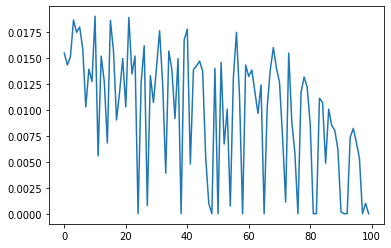

In [7]:
plt.plot(bay_gmm.weights_)

Initialization 0
Initialization converged: True	 time lapse 7.66926s	 ll -2.84013
Initialization 1
Initialization converged: True	 time lapse 6.83027s	 ll -2.84027
Initialization 2
Initialization converged: True	 time lapse 7.34503s	 ll -2.84043
Initialization 3
Initialization converged: True	 time lapse 7.81299s	 ll -2.84073
Initialization 4
Initialization converged: True	 time lapse 9.22347s	 ll -2.84033


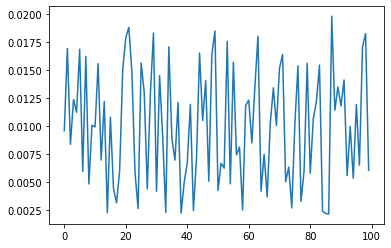

In [8]:
tmp_gmm = mixture.GaussianMixture(n_components=100, random_state=1, verbose = 2, n_init = 5).fit(X_tmp)
plt.plot(tmp_gmm.weights_)

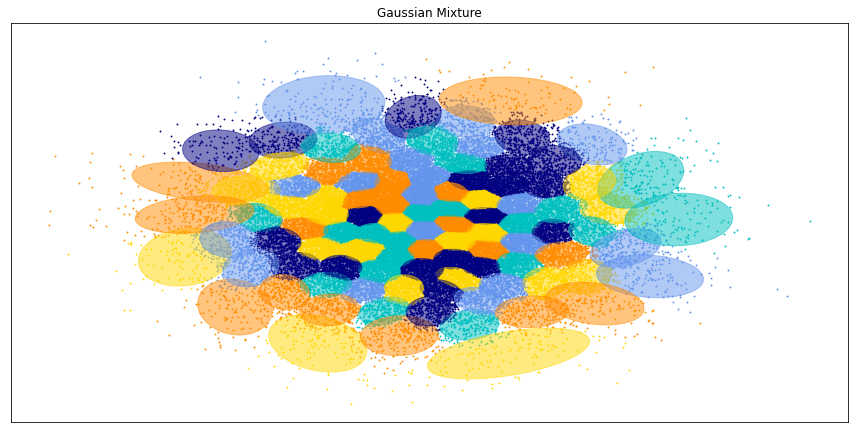

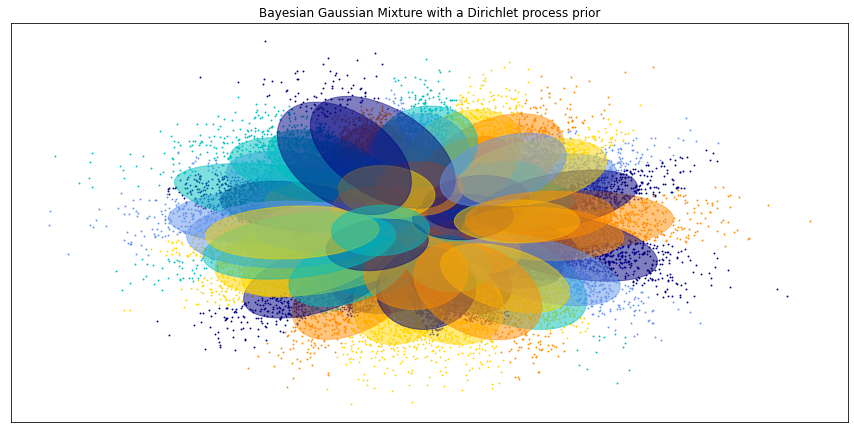

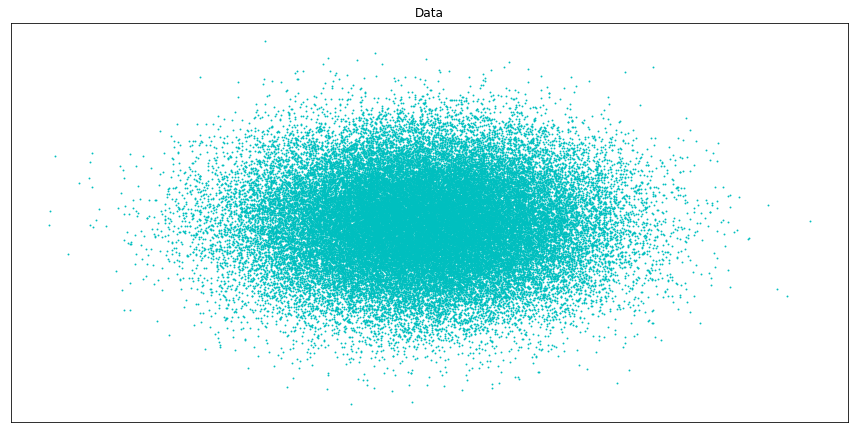

In [9]:
plot_results(X_tmp, tmp_gmm.predict(X_tmp), tmp_gmm.means_, tmp_gmm.covariances_, 0, "Gaussian Mixture")
plot_results(
    X_tmp,
    bay_gmm.predict(X_tmp),
    bay_gmm.means_,
    bay_gmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X_tmp,
    None,
    None,
    None,
    2,
    "Data",
    False
)
plt.show()

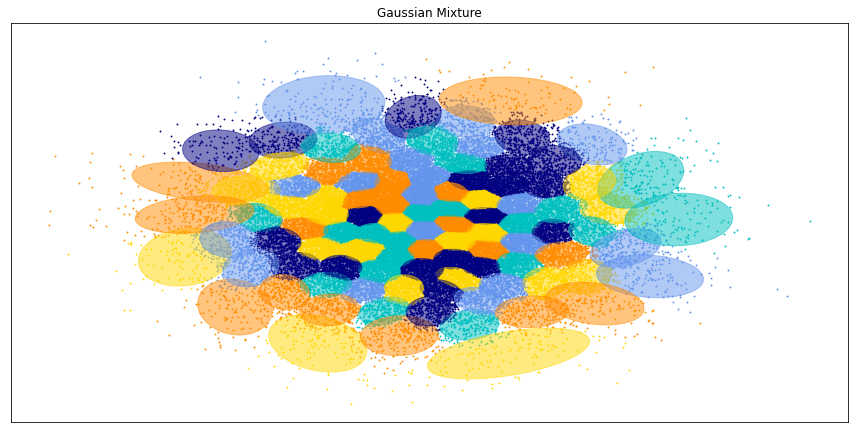

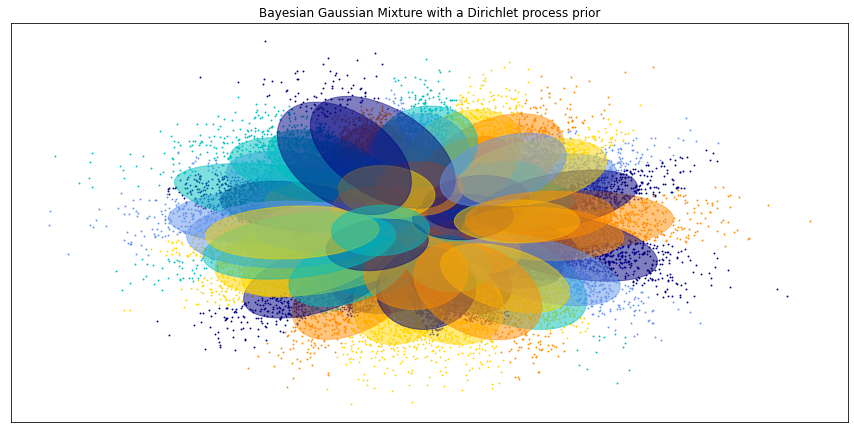

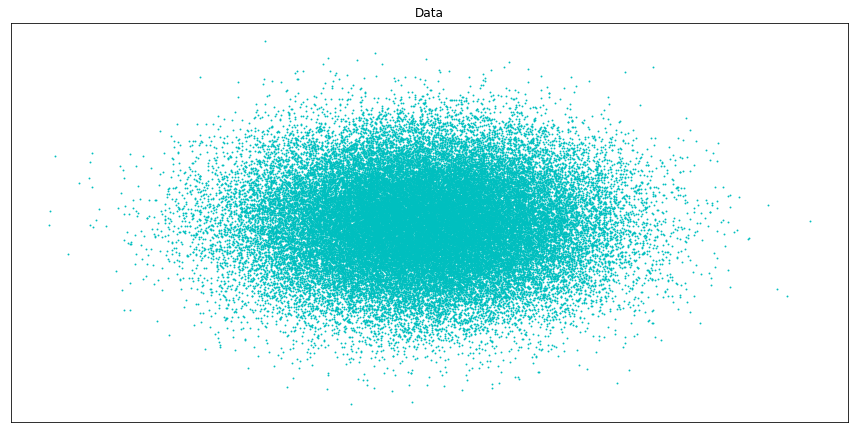

In [10]:
plot_results(X_tmp, tmp_gmm.predict(X_tmp), tmp_gmm.means_, tmp_gmm.covariances_, 0, "Gaussian Mixture")
plot_results(
    X_tmp,
    bay_gmm.predict(X_tmp),
    bay_gmm.means_,
    bay_gmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X_tmp,
    None,
    None,
    None,
    2,
    "Data",
    False
)
plt.show()

## GMM on Generated Data

In [3]:
X = np.zeros((0, 7))
filenames = []

num_components = 0
paths = []
foldername = "/root/catkin_ws/empty_world_trajectory_data/env_000000/"
filenames = sorted(glob.glob("%s/*.p"%foldername))
# filenames

In [4]:
# Create paths from trajectory data
for idx, filename in enumerate(filenames[::2]):
    if idx > 0 and idx%500 == 0:
        print(idx)
    with open(filename, "rb") as f:
        path = pickle.load(f, encoding="latin1")['path']
#         path = pickle.load(f)['path']
        paths.append(path)
        path_len = path.shape[0]
        if path_len > num_components:
            num_components = path_len
        X = np.append(X, path, axis=0)


500
1000
1500
2000
2500
3000
3500
4000
4500


### GMM on dataset

In [7]:
gmm = mixture.GaussianMixture(n_components=num_components * 10, random_state=0, n_init = 5, verbose = 2).fit(X)

Initialization 0
  Iteration 10	 time lapse 1414.35988s	 ll change 0.14457
  Iteration 20	 time lapse 1131.10340s	 ll change 0.11558
  Iteration 30	 time lapse 1081.06253s	 ll change 0.08422
  Iteration 40	 time lapse 1101.44085s	 ll change 0.05174
  Iteration 50	 time lapse 1095.58011s	 ll change 0.03728
  Iteration 60	 time lapse 1055.13940s	 ll change 0.02781
  Iteration 70	 time lapse 1083.28187s	 ll change 0.02080
  Iteration 80	 time lapse 1078.13683s	 ll change 0.01609
  Iteration 90	 time lapse 1075.97174s	 ll change 0.01295
  Iteration 100	 time lapse 1083.26416s	 ll change 0.00905
Initialization converged: False	 time lapse 11199.34083s	 ll -1.28799
Initialization 1
  Iteration 10	 time lapse 1394.40756s	 ll change 0.14691
  Iteration 20	 time lapse 1114.02399s	 ll change 0.10521
  Iteration 30	 time lapse 1087.42109s	 ll change 0.08024
  Iteration 40	 time lapse 1133.61095s	 ll change 0.06079
  Iteration 50	 time lapse 1114.37723s	 ll change 0.03536
  Iteration 60	 time laps

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [ ]:
edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = gmm.predict(path[:, :2])
    if idx%100 == 0:
        print(predicted_distributions)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])


In [ ]:
gmm_name = 'gmm

In [8]:
gmm_name = 'gmm_table/'

import os
if not os.path.exists(gmm_name):
    os.makedirs(gmm_name)

np.save(gmm_name + 'weights', gmm.weights_, allow_pickle=False)
np.save(gmm_name + 'means', gmm.means_, allow_pickle=False)
np.save(gmm_name + 'covariances', gmm.covariances_, allow_pickle=False)



### Dirichlet Process on data

In [5]:
dpgmm = mixture.BayesianGaussianMixture(n_components=num_components * 10, random_state=1, verbose=2, n_init = 5).fit(X)

Initialization 0
  Iteration 10	 time lapse 1401.81910s	 ll change 7759.20817
  Iteration 20	 time lapse 1157.99988s	 ll change 3171.64386
  Iteration 30	 time lapse 1132.42935s	 ll change 1527.59975
  Iteration 40	 time lapse 1134.61498s	 ll change 1009.03858
  Iteration 50	 time lapse 1136.71842s	 ll change 660.78270
  Iteration 60	 time lapse 1133.99693s	 ll change 597.33418
  Iteration 70	 time lapse 1149.94227s	 ll change 366.48407
  Iteration 80	 time lapse 1130.60028s	 ll change 402.66084
  Iteration 90	 time lapse 1146.15514s	 ll change 249.72400
  Iteration 100	 time lapse 1148.30678s	 ll change 238.80399
Initialization converged: False	 time lapse 11672.58319s	 ll -1281363.10908
Initialization 1
  Iteration 10	 time lapse 1405.27714s	 ll change 7619.72449
  Iteration 20	 time lapse 1166.77609s	 ll change 3074.80264
  Iteration 30	 time lapse 1123.07812s	 ll change 1616.71407
  Iteration 40	 time lapse 1136.64889s	 ll change 1135.71815
  Iteration 50	 time lapse 1155.15635s	 l

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [6]:
dpgmm_name = 'dpgmm_table/'

import os
if not os.path.exists(dpgmm_name):
    os.makedirs(dpgmm_name)

np.save(dpgmm_name + 'weights', dpgmm.weights_, allow_pickle=False)
np.save(dpgmm_name + 'means', dpgmm.means_, allow_pickle=False)
np.save(dpgmm_name + 'covariances', dpgmm.covariances_, allow_pickle=False)

In [10]:
gmm_predicted = gmm.predict(X)
dpgmm_predicted = dpgmm.predict(X)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


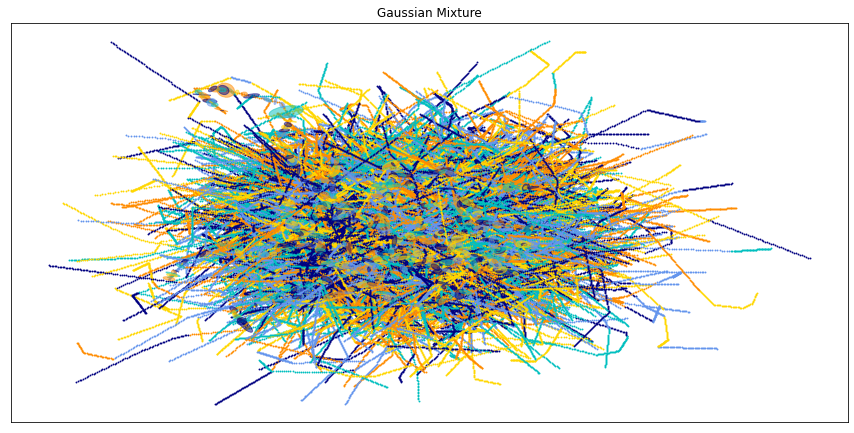

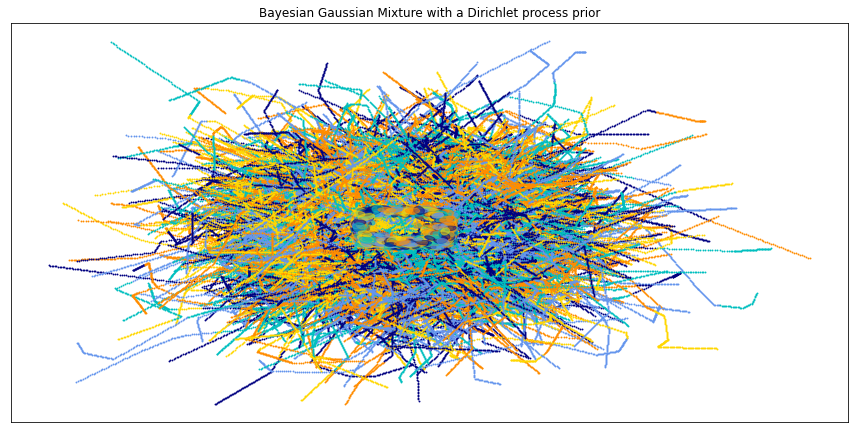

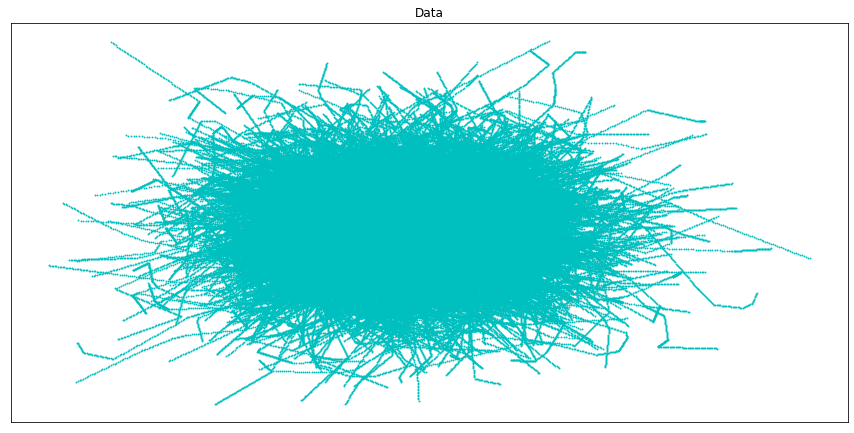

In [11]:
X_pca = PCA(n_components=2).fit_transform(X)
plot_results(X_pca, gmm_predicted, PCA(n_components=2).fit_transform(X) , gmm.covariances_, 0, "Gaussian Mixture")
# # plt.show()
# # Fit a Dirichlet process Gaussian mixture using five components
plot_results(
    X_pca,
    dpgmm_predicted,
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# # plt.show()
# # plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X_pca,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    2,
    "Data",
    False
)
plt.show()

## Code to create graph from GMM

In [12]:
# replace dpgmm with gmm if using GMM
edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = dpgmm.predict(path)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])

edges = np.array(edges)
unique, counts = np.unique(edges, return_counts=True, axis = 0)
probabilities = counts / np.sum(counts) # the probability of the edge e_i occuring amongst all edges

np.save("dpgmm_table/edges.npy", unique)
np.save("dpgmm_table/edge_probabilities.npy", probabilities)

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [13]:
# replace dpgmm with gmm if using GMM
edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = gmm.predict(path)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])

edges = np.array(edges)
unique, counts = np.unique(edges, return_counts=True, axis = 0)
probabilities = counts / np.sum(counts) # the probability of the edge e_i occuring amongst all edges

np.save("gmm_table/edges.npy", unique)
np.save("gmm_table/edge_probabilities.npy", probabilities)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
